# Матрицы направляющих косинусов

## Инициализация

In [ ]:
# если не установлены пакеты  Python - запустите эту ячейку с установочным скриптом
# if several packages are not installed - run this cell
!python -m pip install numpy sympy ipywidgets matplotlib --user

In [1]:
%config IPCompleter.greedy=True
# %matplotlib notebook # use in case of simple jupyter notebook
%matplotlib widget # use in case of jupyter lab
import sympy as sp
from sympy import *
from sympy.interactive import printing
from sympy import pi
from sympy.matrices import rot_axis1, rot_axis2, rot_axis3
from ipywidgets import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d   
import numpy as np
# init_printing(use_unicode=True)
init_printing(use_latex=True)

## Элементарные матрицы поворота / X, Y, Z-rotation matrices

In [2]:
alpha_x, alpha_y, alpha_z = symbols('\\alpha_x \\alpha_y \\alpha_z')
print("Элементарная матрица поворота по X")
display(rot_axis1(alpha_x))
print("Элементарная матрица поворота по Y")
display(rot_axis2(alpha_y))
print("Элементарная матрица поворота по Z")
display(rot_axis3(alpha_z))

Элементарная матрица поворота по X


⎡1        0             0      ⎤
⎢                              ⎥
⎢0  cos(\alphaₓ)   sin(\alphaₓ)⎥
⎢                              ⎥
⎣0  -sin(\alphaₓ)  cos(\alphaₓ)⎦

Элементарная матрица поворота по Y


⎡cos(\alpha_y)  0  -sin(\alpha_y)⎤
⎢                                ⎥
⎢      0        1        0       ⎥
⎢                                ⎥
⎣sin(\alpha_y)  0  cos(\alpha_y) ⎦

Элементарная матрица поворота по Z


⎡cos(\alpha_z)   sin(\alpha_z)  0⎤
⎢                                ⎥
⎢-sin(\alpha_z)  cos(\alpha_z)  0⎥
⎢                                ⎥
⎣      0               0        1⎦

## НЗСК 🡆 связанная / Earth 🡆 body

In [3]:
roll, pitch, yaw = symbols('\\gamma \\vartheta \\psi')
print("Заданы обозначения для крена, тангажа и рысканья (roll, pytch, yaw symbols introduced):")
display([roll, pitch, yaw])

Заданы обозначения для крена, тангажа и рысканья (roll, pytch, yaw symbols introduced):


In [4]:
# результат совпадает с Дмитриевским
MatNorm2Body=rot_axis1(roll) * rot_axis3(pitch) * rot_axis2(yaw)
MatNorm2Body

⎡                  cos(\psi)⋅cos(\vartheta)                          sin(\vart
⎢                                                                             
⎢sin(\gamma)⋅sin(\psi) - sin(\vartheta)⋅cos(\gamma)⋅cos(\psi)  cos(\gamma)⋅cos
⎢                                                                             
⎣sin(\gamma)⋅sin(\vartheta)⋅cos(\psi) + sin(\psi)⋅cos(\gamma)  -sin(\gamma)⋅co

heta)                           -sin(\psi)⋅cos(\vartheta)                  ⎤
                                                                           ⎥
(\vartheta)   sin(\gamma)⋅cos(\psi) + sin(\psi)⋅sin(\vartheta)⋅cos(\gamma) ⎥
                                                                           ⎥
s(\vartheta)  -sin(\gamma)⋅sin(\psi)⋅sin(\vartheta) + cos(\gamma)⋅cos(\psi)⎦

## НЗСК 🡆 траекторная

In [5]:
Theta, Psi = symbols("\\Theta \\Psi")
print("Заданы обозначения для угла наклона траектории и угла поворта траектории:")
display([Theta, Psi])

Заданы обозначения для угла наклона траектории и угла поворта траектории:


In [6]:
# результат совпадает с Дмитриевским
MatTraj2Norm= rot_axis3(Theta) * rot_axis2(Psi)
# MatTraj2Norm=MatTraj2Norm.transpose()
MatTraj2Norm

⎡cos(\Psi)⋅cos(\Theta)   sin(\Theta)  -sin(\Psi)⋅cos(\Theta)⎤
⎢                                                           ⎥
⎢-sin(\Theta)⋅cos(\Psi)  cos(\Theta)  sin(\Psi)⋅sin(\Theta) ⎥
⎢                                                           ⎥
⎣      sin(\Psi)              0             cos(\Psi)       ⎦

## Скоростная 🡆 траекторная

In [7]:
gamma_s = symbols("\\gamma_s")
print("Задано обозначение для скоростного угла крена:")
display(gamma_s)

Задано обозначение для скоростного угла крена:


In [8]:
# проверена по Дмитриевскому
MatWind2Traj = rot_axis1(-gamma_s)
MatWind2Traj

⎡1       0              0      ⎤
⎢                              ⎥
⎢0  cos(\gammaₛ)  -sin(\gammaₛ)⎥
⎢                              ⎥
⎣0  sin(\gammaₛ)  cos(\gammaₛ) ⎦

## Связанная 🡆 связанная с пространственным углом атаки / Body ref.system 🡆 Spatial AOA ref.system

In [9]:
alpha_p, gamma_p = symbols("\\alpha_п \\gamma_п")
print("Заданы обозначения пространственного угла атаки и крена:")
display([alpha_p, gamma_p])

Заданы обозначения пространственного угла атаки и крена:


In [10]:
# НЕ ПРОВЕРЕНА - нет источников
# проверена по отдельным матрицам
MatBody2Spatial = rot_axis3(-alpha_p) * rot_axis1(gamma_p)
MatBody2Spatial

⎡cos(\alpha_п)  -sin(\alpha_п)⋅cos(\gamma_п)  -sin(\alpha_п)⋅sin(\gamma_п)⎤
⎢                                                                         ⎥
⎢sin(\alpha_п)  cos(\alpha_п)⋅cos(\gamma_п)   sin(\gamma_п)⋅cos(\alpha_п) ⎥
⎢                                                                         ⎥
⎣      0               -sin(\gamma_п)                cos(\gamma_п)        ⎦

## Связанная 🡆 скоростная / Body 🡆 wind ref.system

In [11]:
alpha, beta = symbols("\\alpha \\beta")
print("Заданы обозначения пространственного углов атаки и спольжения (angle of attack and sideslip angle symbols introduced):")
display([alpha_p, gamma_p])

Заданы обозначения пространственного углов атаки и спольжения (angle of attack and sideslip angle symbols introduced):


In [12]:
# проверена по ГОСТ
MatBodyToWind = rot_axis2(-beta) * rot_axis3(-alpha)
MatBodyToWind

⎡cos(\alpha)⋅cos(\beta)   -sin(\alpha)⋅cos(\beta)  sin(\beta)⎤
⎢                                                            ⎥
⎢      sin(\alpha)              cos(\alpha)            0     ⎥
⎢                                                            ⎥
⎣-sin(\beta)⋅cos(\alpha)  sin(\alpha)⋅sin(\beta)   cos(\beta)⎦

## Геоцентрическая 🡆 нормальная СК / ECEF 🡆 Earth ref.system

In [13]:
lat, lon, azimuth = symbols('\\varphi \\lambda \\widehat{\\mathbf{Az}}')
print("Заданы обозначения пространственного широты, долготы, азимута (latitude, longitude and azimuth introduced):")
display([lat, lon, azimuth])

Заданы обозначения пространственного широты, долготы, азимута (latitude, longitude and azimuth introduced):


In [14]:
MatGeocentric2Norm = rot_axis3(pi/2 - azimuth) * rot_axis1(-lat) * rot_axis2(pi/2 + lon)
MatGeocentric2Norm

⎡-sin(\lambda)⋅sin(\widehat{\mathbf{Az}}) - sin(\varphi)⋅cos(\lambda)⋅cos(\wid
⎢                                                                             
⎢sin(\lambda)⋅cos(\widehat{\mathbf{Az}}) - sin(\varphi)⋅sin(\widehat{\mathbf{A
⎢                                                                             
⎣                                   cos(\lambda)⋅cos(\varphi)                 

ehat{\mathbf{Az}})  cos(\varphi)⋅cos(\widehat{\mathbf{Az}})  sin(\lambda)⋅sin(
                                                                              
z}})⋅cos(\lambda)   sin(\widehat{\mathbf{Az}})⋅cos(\varphi)  sin(\lambda)⋅sin(
                                                                              
                                 sin(\varphi)                                 

\varphi)⋅cos(\widehat{\mathbf{Az}}) - sin(\widehat{\mathbf{Az}})⋅cos(\lambda)⎤
                                                                             ⎥
\varphi)⋅sin(\widehat{\mathbf{Az}}) + cos(\lambda)

## //TODO Кинематические уравнения Эйлера

## //TODO Углы из матриц

In [15]:
# https://en.wikipedia.org/wiki/Rotation_formalisms_in_three_dimensions#Conversion_formulae_between_formalisms
# TODO проверить численным расчётом исходных углов обратно
display(atan2(MatNorm2Body[2,0],MatNorm2Body[2,1]))
display(acos(MatNorm2Body[2,2]))
display(-atan2(MatNorm2Body[0,2],MatNorm2Body[1,2]))

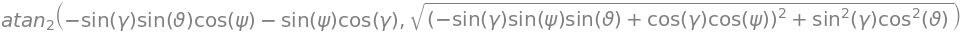

In [16]:
# https://stackoverflow.com/a/37558238/12691808
# TODO проверить численным расчётом исходных углов обратно
display( atan2(MatNorm2Body[1,0], MatNorm2Body[0,0]) ) # yaw
display( atan2(-MatNorm2Body[2,0], sqrt( MatNorm2Body[2,1]**2+MatNorm2Body[2,2]**2 ) ) ) # pitch
display( atan2(MatNorm2Body[2,1], MatNorm2Body[2,2]) ) # roll